In [1]:
%matplotlib notebook

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pylab
import statistics as st
from sklearn import linear_model, metrics
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
def printStats():
    print('Var(Z) = ', st.variance(Z))
    print('Var(X) = ', st.variance(X))
    print('Var(Y) = ', st.variance(Y))
    print('Cov(Z,X) = ', np.cov(Z,X)[0,1])
    print('Cov(Z,Y) = ', np.cov(Z,Y)[0,1])
    print('Cov(X,Y) = ', np.cov(Y,X)[0,1])
    lin_modelYX = linear_model.LinearRegression()
    lin_modelYX.fit(X.reshape(-1,1), Y.reshape(-1,1))
    print('Regression coefficient Y on X (alpha)', lin_modelYX.coef_[0,0], 'Uy = ', lin_modelYX.intercept_[0])
    lin_modelZXY = linear_model.LinearRegression()
    lin_modelZXY.fit(np.transpose(np.vstack((X,Y))), Z.reshape(-1,1))
    print('Regression coefficient Z on X and Y: beta = ', lin_modelZXY.coef_[0,0], ', gamma = ', lin_modelZXY.coef_[0,1], ', Uz = ', lin_modelZXY.intercept_)
    print('Corr(Z,X) = ', np.corrcoef(Z,X)[0,1])
    print('Corr(Z,Y) = ', np.corrcoef(Z,Y)[0,1])
    print('Corr(X,Y) = ', np.corrcoef(Y,X)[0,1])

In [4]:
n=10000
alpha = 2
beta = 0.5
gamma = 2
Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
Uy = np.asarray([random.gauss(0,1) for _ in range(n)])

X = Ux
Y = alpha * X + Uy
Z = beta * X + gamma * Y + Uz

In [5]:
def estimateSelectionBias(n, alpha, beta, gamma):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])

    X = Ux
    Y = alpha * X + Uy
    Z = beta * X + gamma * Y + Uz
    
    VarZ = st.variance(Z)
    VarX = st.variance(X)
    VarY = st.variance(Y)
    CovXZ = CovZX = np.cov(Z,X)[0,1]
    CovZY = CovYZ = np.cov(Z,Y)[0,1]
    CovXY = CovYX = np.cov(Y,X)[0,1]
    
    selBias = (CovZX * (((CovYX/VarX)*CovXZ) - CovYZ)) / ((VarX * VarZ) - (CovXZ * CovXZ))
    return selBias

In [6]:
def estimateSelectionBiasLight(n, alpha, beta, gamma, Ux, Uy, Uz):
    
    X = Ux
    Y = alpha * X + Uy
    Z = beta * X + gamma * Y + Uz
    
    VarZ = st.variance(Z)
    VarX = st.variance(X)
    VarY = st.variance(Y)
    CovXZ = CovZX = np.cov(Z,X)[0,1]
    CovZY = CovYZ = np.cov(Z,Y)[0,1]
    CovXY = CovYX = np.cov(Y,X)[0,1]
    
    selBias = (CovZX * (((CovYX/VarX)*CovXZ) - CovYZ)) / ((VarX * VarZ) - (CovXZ * CovXZ))
    return selBias

In [7]:
def generate4DPlotData(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    data = np.zeros((1,4))
    maxVal = -math.inf
    minVal = math.inf
    for alpha in np.arange(-1.0,1.01,0.2):
        for beta in np.arange(-1.0,1.01,0.2):
            for gamma in np.arange(-1.0,1.01,0.2):
                biasVal = estimateSelectionBiasLight(n,alpha,beta,gamma,Ux,Uy,Uz)
                data = np.vstack((data,np.array([alpha,beta,gamma,biasVal])))
                if biasVal > maxVal:
                    maxVal = biasVal
                    alphaMax = alpha
                    betaMax = beta
                    gammaMax = gamma
                if biasVal < minVal:
                    alphaMin = alpha
                    minVal = biasVal
                    betaMin = beta
                    gammaMin = gamma
    print('Max bias = ', maxVal, '(alpha=', alphaMax, 'beta=', betaMax, 'gamma=', gammaMax,')')
    print('Min bias = ', minVal, '(alpha=', alphaMin, 'beta=', betaMin, 'gamma=', gammaMin,')')
    return data
                
    

In [8]:
l = generate4DPlotData(100)

Max bias =  1.0647391426139212 (alpha= -1.0 beta= -1.0 gamma= 0.9999999999999996 )
Min bias =  -1.1216090875350275 (alpha= 0.9999999999999996 beta= -1.0 gamma= -1.0 )


In [9]:
l.shape

(1332, 4)

In [10]:
def plot4DPlot(data):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = data[:,2]
    y = data[:,1]
    z = data[:,0]
    c = data[:,3]

    img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
    #img = ax.scatter(x, y, z, c=c)
    
    ax.set_xlabel('gamma')
    ax.set_ylabel('beta')
    ax.set_zlabel('alpha')
    
    ax.view_init(25, 60)
    
    #label = pylab.annotate(
    #"Bias= , beta= , gamma= ", 
    #xy = (0.02, 0.06), xytext = (20, 20),
    #textcoords = 'offset points', ha = 'right', va = 'bottom',
    #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    #fig.colorbar(surf, shrink=0.5, aspect=5)
    fig.colorbar(img)
    plt.show()   

Max bias =  1.132276326378278 (alpha= -1.0 beta= -1.0 gamma= 0.9999999999999996 )
Min bias =  -1.2040569413448976 (alpha= 0.9999999999999996 beta= -1.0 gamma= -1.0 )


<IPython.core.display.Javascript object>


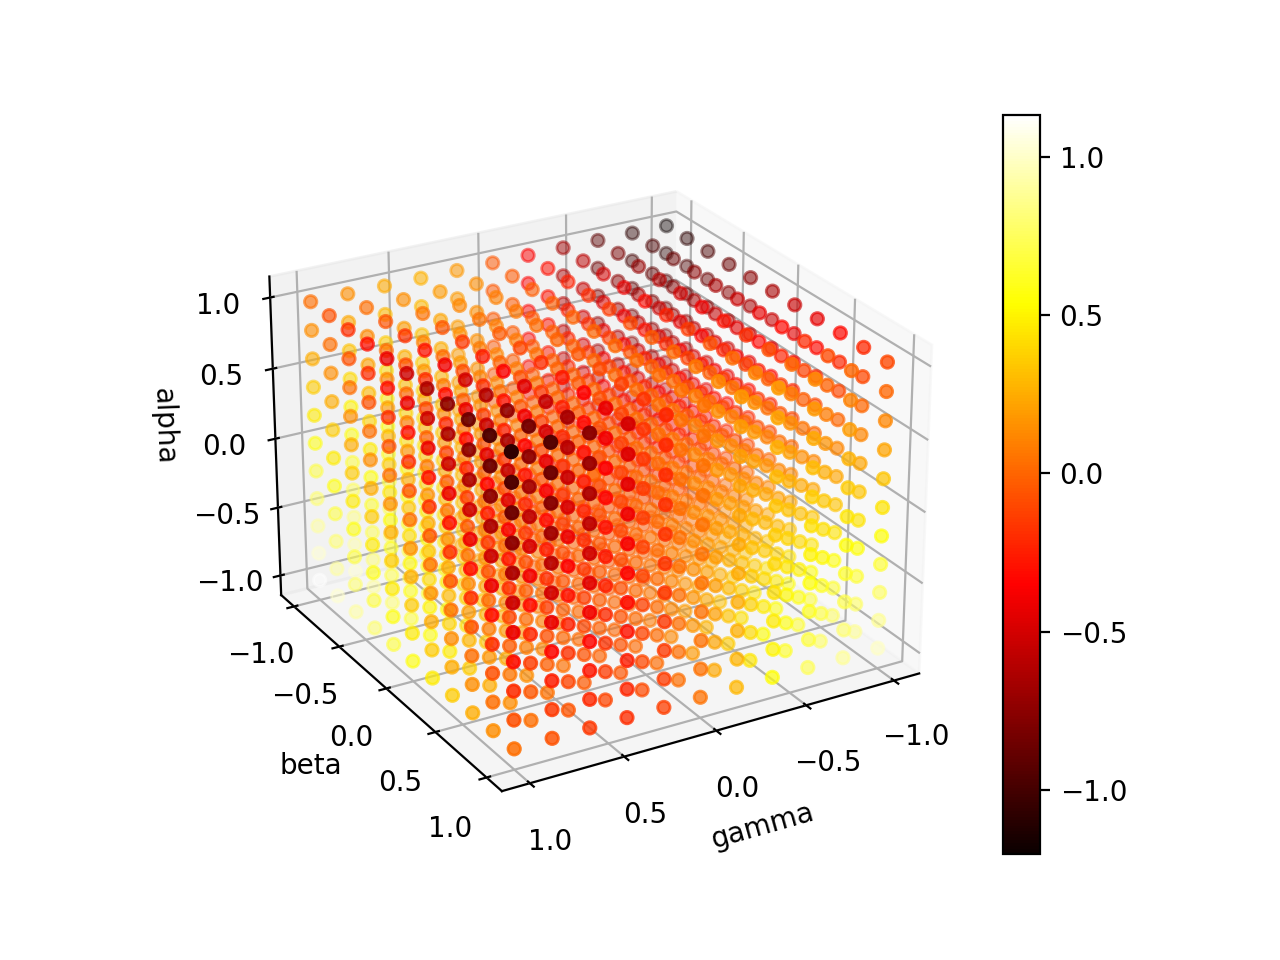

In [11]:
plot4DPlot(generate4DPlotData(100))

In [17]:
def generate3DPlotData(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    #data = np.zeros((1,3))
    betas = np.arange(-1.0,1.01,0.1)
    gammas = np.arange(-1.0,1.01,0.1)
    bs, gs = np.meshgrid(betas,gammas)
    bias = np.zeros((len(bs),len(gs)))
    maxVal = -math.inf
    minVal = math.inf
    for i in range(len(bs)):
        for j in range(len(gs)):
            bias[i][j] = estimateSelectionBiasLight(n,0.5,bs[i][j],gs[i][j],Ux,Uy,Uz)
            if bias[i][j] > maxVal:
                maxVal = bias[i][j]
                betaMax = bs[i][j]
                gammaMax = gs[i][j]
            if bias[i][j] < minVal:
                minVal = bias[i][j]
                betaMin = bs[i][j]
                gammaMin = gs[i][j]
    print('Max bias = ', maxVal, '(beta=', betaMax, 'gamma=', gammaMax,')')
    print('Min bias = ', minVal, '(beta=', betaMin, 'gamma=', gammaMin,')')
        
    return (bs, gs, bias, (maxVal,betaMax,gammaMax))
                

In [18]:
X,Y,Z,b = generate3DPlotData(500)

Max bias =  0.3231191132911818 (beta= 0.9999999999999996 gamma= -0.5000000000000001 )
Min bias =  -0.779699466504281 (beta= -1.0 gamma= -1.0 )


In [14]:
print(b)

(0.32444969178560945, 0.9999999999999996, -0.6000000000000001)


In [25]:
def plot3D(plotData):
    
    print('test')
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    X,Y,Z,maxBias = plotData

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.view_init(20, 45)
    ax.set_xlabel(r'$\eta$')
    ax.set_ylabel(r'$\epsilon$')
    ax.set_zlabel('Bias')
    #ax.set_title('test')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    bias,beta,gamma = maxBias
    
#     annotation = "Bias = " + str(bias) + ', beta=' + str(beta) + ', gamma=' + str(gamma)
#     print(annotation)
    
#     label = pylab.annotate(
#     "Max Bias =" + str(round(bias,2)) + ', beta=' + str(round(beta,2)) + ', gamma=' + str(round(gamma,2)), 
#     xy = (0.02, 0.06), xytext = (20, 20),
#     textcoords = 'offset points', ha = 'right', va = 'bottom',
#     bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5))
    #,
    #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    plt.show()

Max bias =  0.35139155112658266 (beta= 0.9999999999999996 gamma= -0.6000000000000001 )
Min bias =  -0.7638822460490737 (beta= 0.9999999999999996 gamma= 0.9999999999999996 )
test


<IPython.core.display.Javascript object>


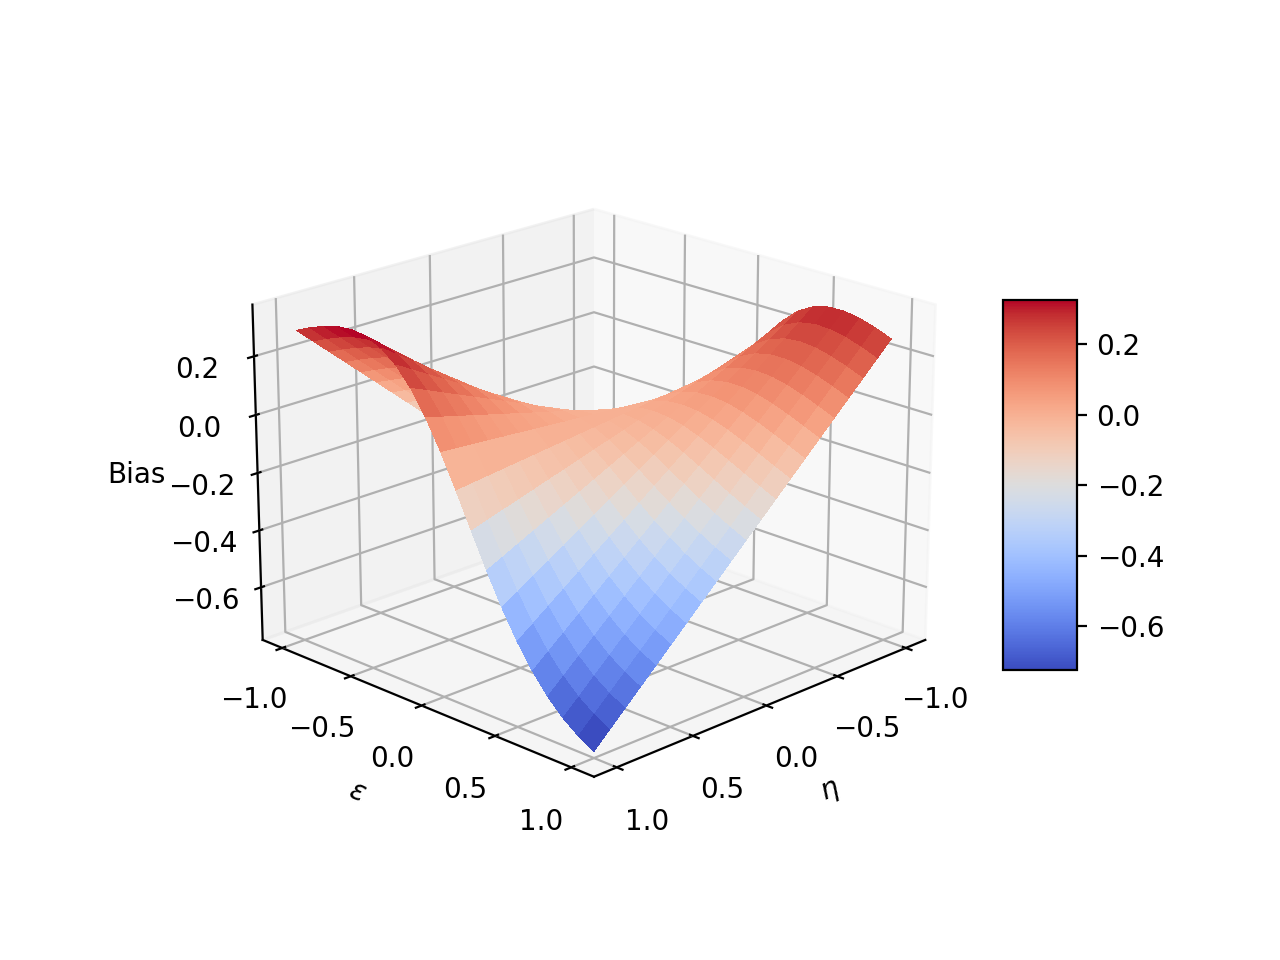

In [26]:
plot3D(generate3DPlotData(500))

In [396]:
betaGammaData = generate3DPlotData(1000)

Max bias =  0.28774641333052353 (beta= 0.9999999999999996 gamma= -0.6000000000000001 )
Min bias =  -0.7507355547576297 (beta= 0.9999999999999996 gamma= 0.9999999999999996 )


In [161]:
betaGammaData.shape

(1682, 3)

In [27]:
print(estimateSelectionBias(1000,3,0.5,3))

24.248289396813878


In [341]:
def generateBiasAlphas(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    X = []
    Y = []
    for i in np.arange(-1,1,0.01):
        X.append(i)
        Y.append(estimateSelectionBiasLight(1000,i,0.5,0.5,Ux,Uy,Uz))
    return (X,Y)

In [419]:
aax,ay = generateBiasAlphas(1000)

In [343]:
def generateBiasBetas(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    X = []
    Y = []
    for i in np.arange(-1,1,0.01):
        X.append(i)
        Y.append(estimateSelectionBiasLight(1000,0.5,i,0.5,Ux,Uy,Uz))
    return (X,Y)

In [420]:
bx,by = generateBiasBetas(1000)

In [334]:
def generateBiasGammas(n):
    Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
    Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
    X = []
    Y = []
    for i in np.arange(-1,1,0.01):
        X.append(i)
        Y.append(estimateSelectionBiasLight(1000,0.5,0.5,i,Ux,Uy,Uz))
    return (X,Y)

In [421]:
gx,gy = generateBiasGammas(1000)

In [422]:
plt.plot(aax,ay)

<IPython.core.display.Javascript object>


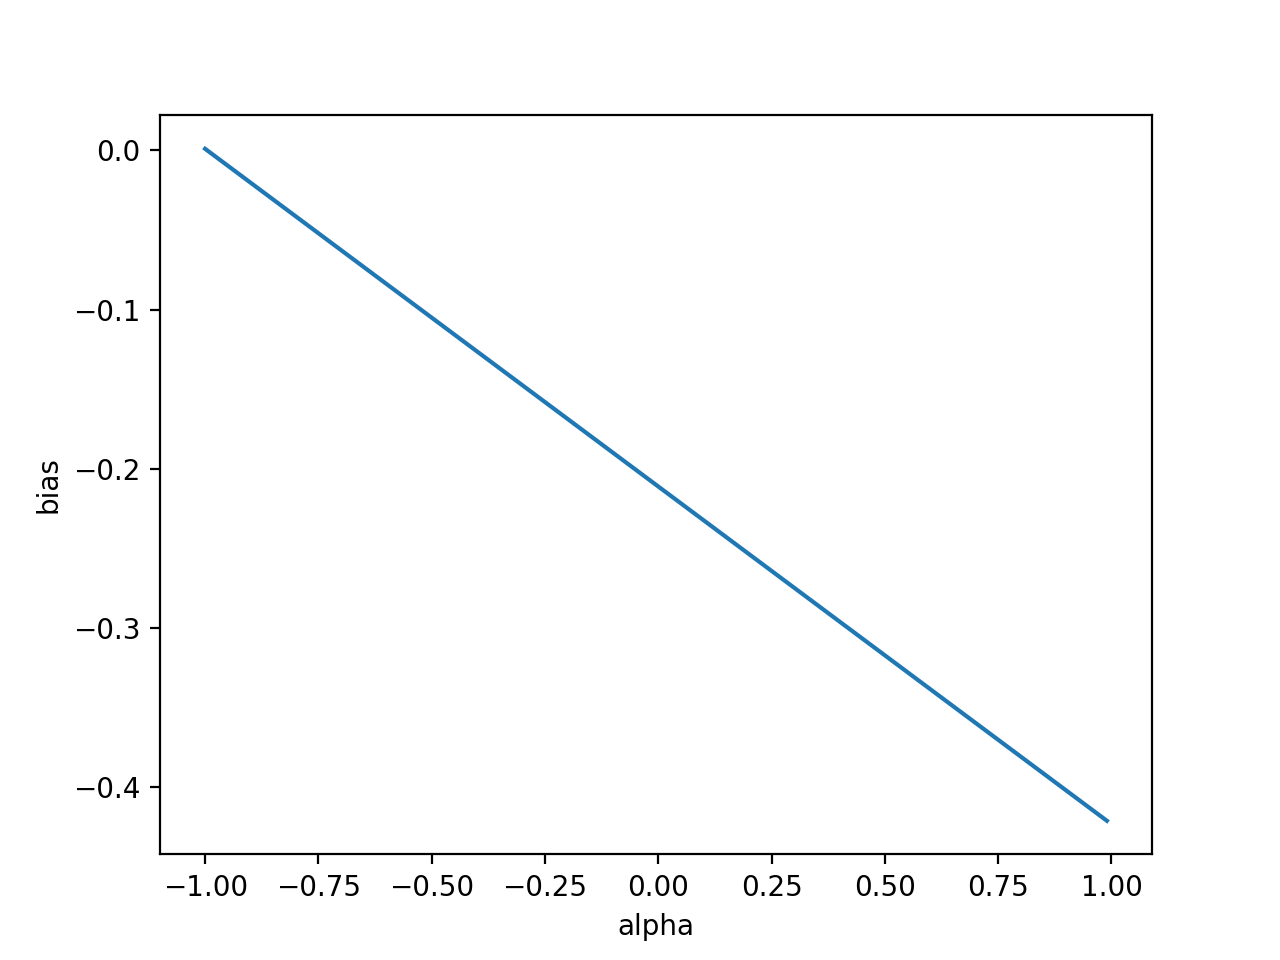

In [423]:
fig, ax = plt.subplots()
ax.plot(aax,ay)

ax.set(xlabel='alpha', ylabel='bias')

plt.show()

In [404]:
plt.plot(bx,by)

<IPython.core.display.Javascript object>


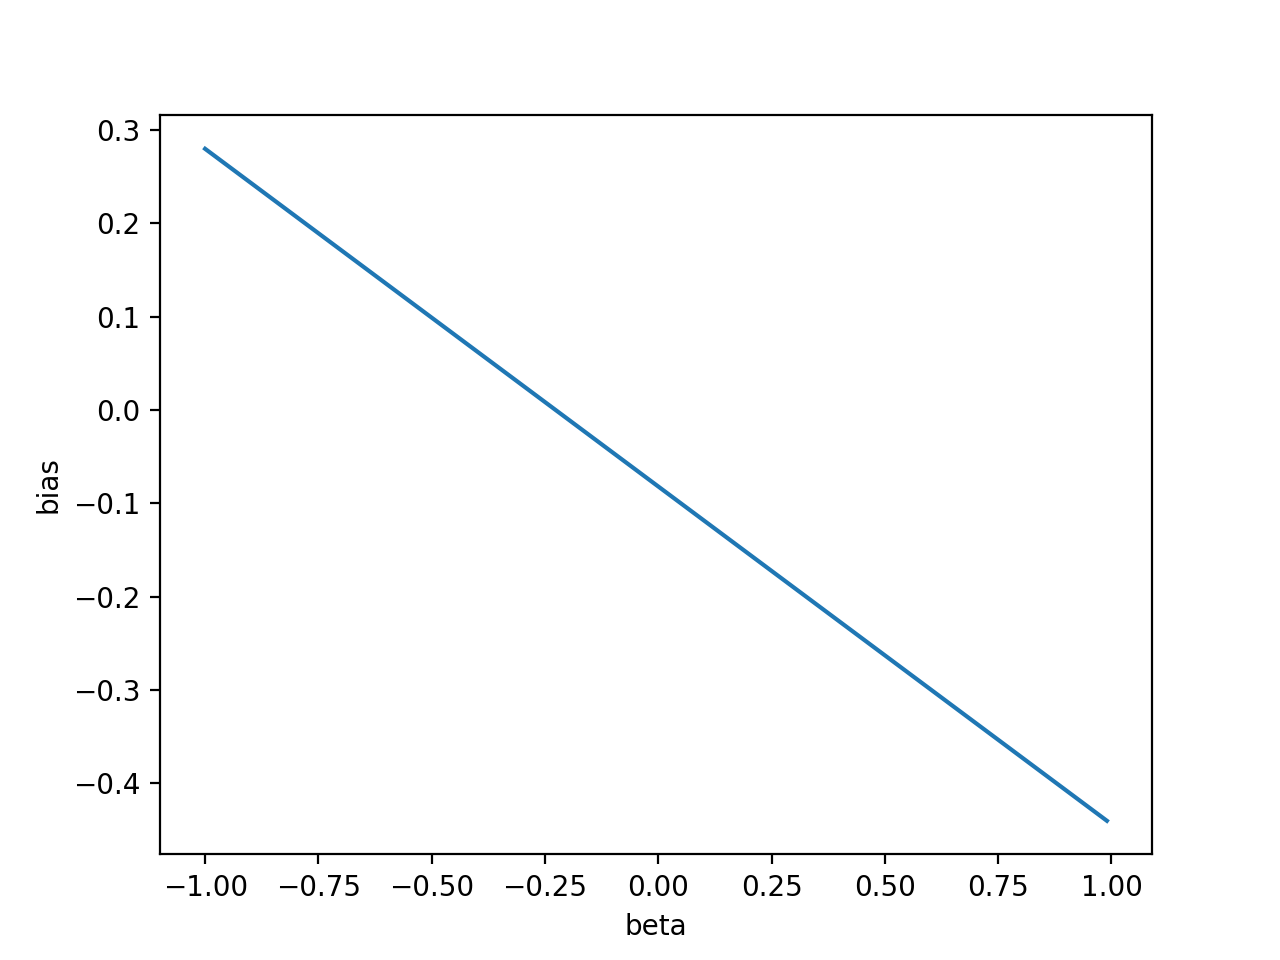

In [424]:
fig, ax = plt.subplots()
ax.plot(bx,by)

ax.set(xlabel='beta', ylabel='bias')

plt.show()

In [405]:
plt.plot(gx,gy)

<IPython.core.display.Javascript object>


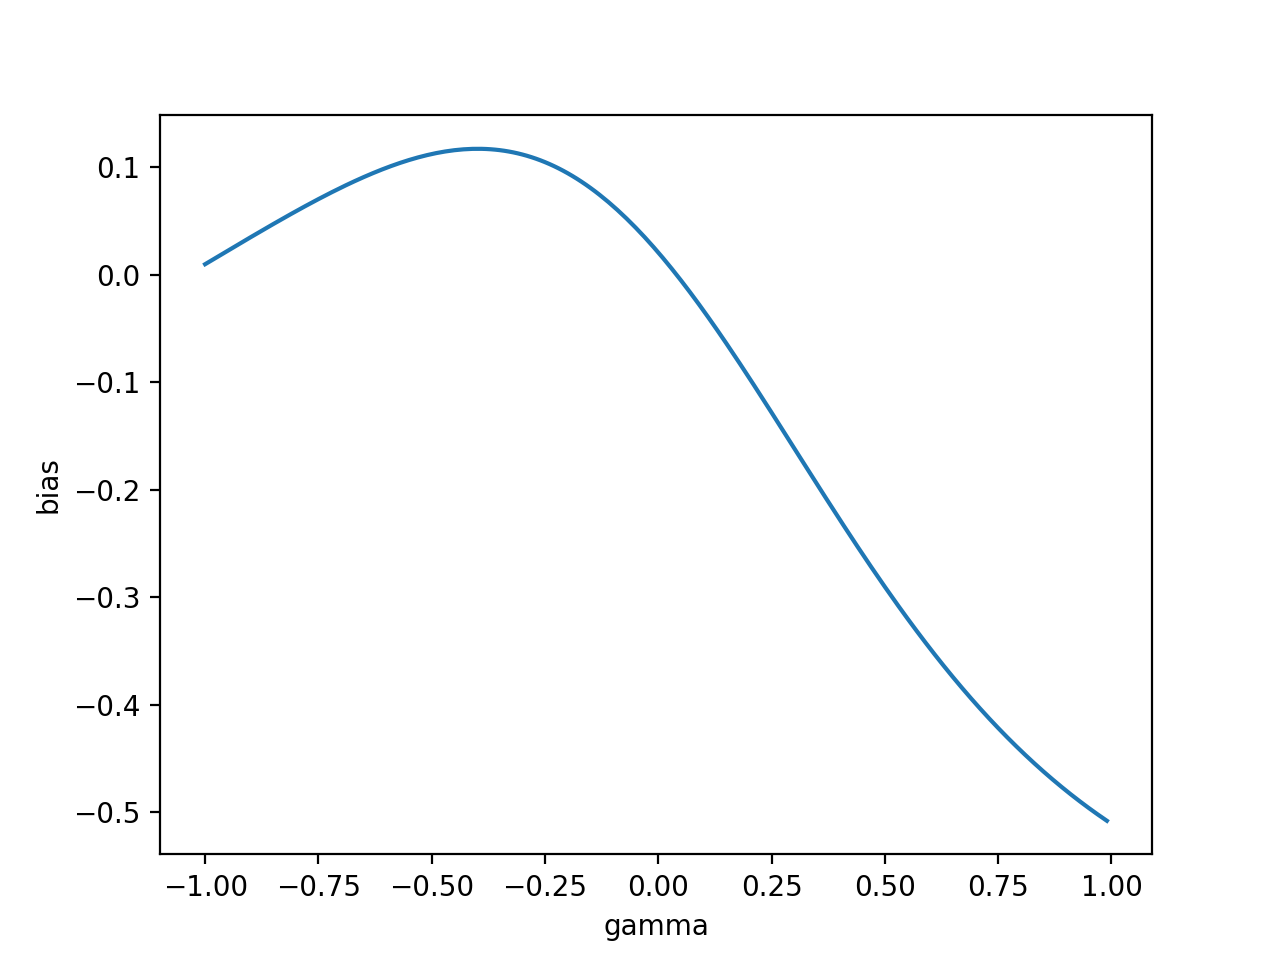

In [425]:
fig, ax = plt.subplots()
ax.plot(gx,gy)

ax.set(xlabel='gamma', ylabel='bias')

plt.show()

In [52]:
da = np.transpose(np.vstack((alphas,betas,gammas)))

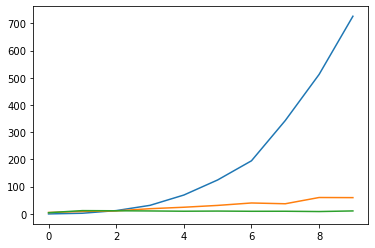

In [53]:
plt.plot(da)

<IPython.core.display.Javascript object>


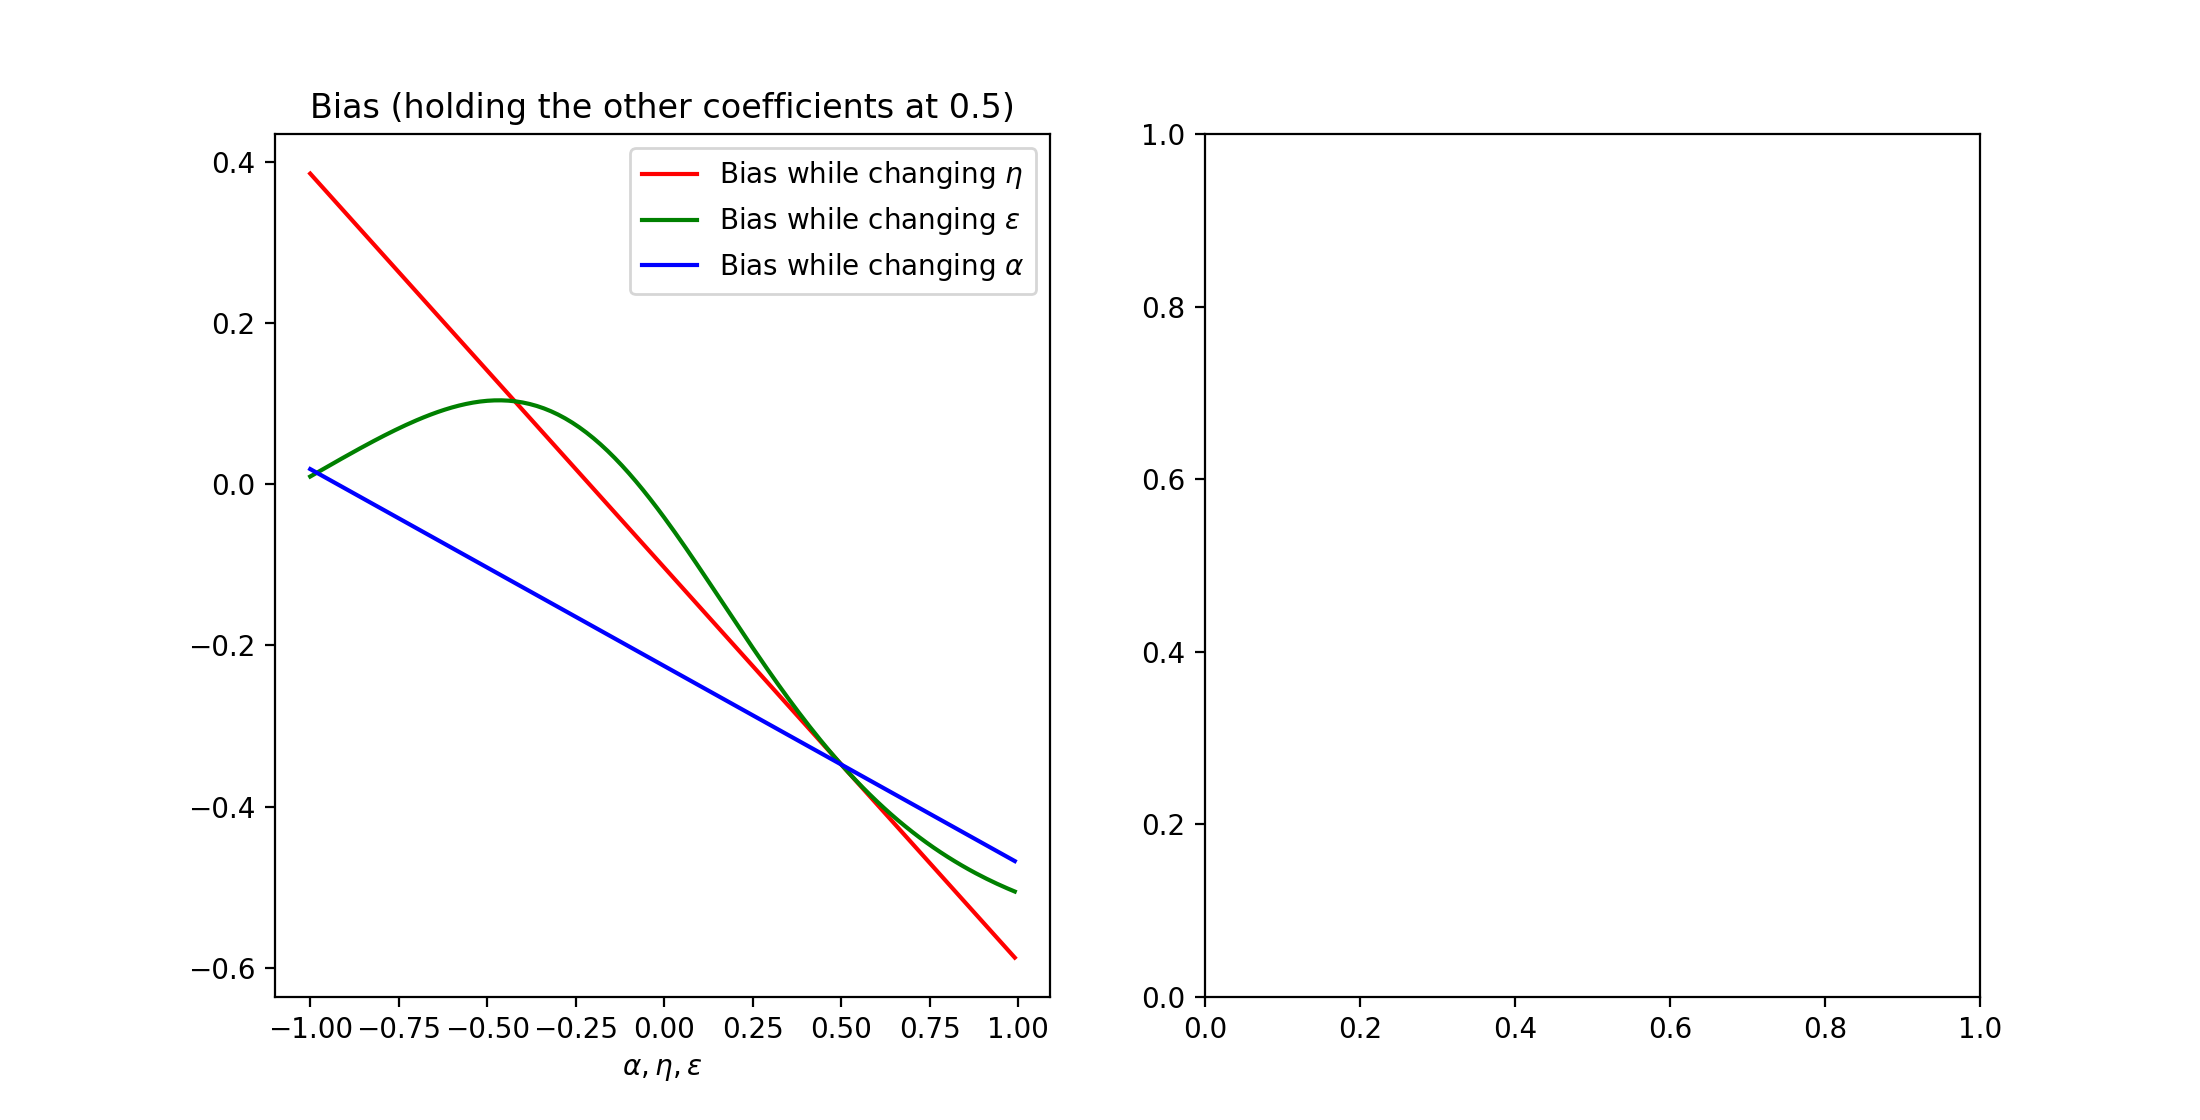

In [30]:
n = 1000
Ux = np.asarray([random.gauss(0,1) for _ in range(n)])
Uz = np.asarray([random.gauss(0,1) for _ in range(n)])
Uy = np.asarray([random.gauss(0,1) for _ in range(n)])
# X = []
# Y = []
# for i in np.arange(-1,1,0.01):
#     X.append(i)
#     Y.append(estimateConfounderBiasLight(1000,0.5,i,0.5,Ux,Uy,Uz))
# return (X,Y)

biasesEtas = {}
biasesEpsilons = {}
biasesAlphas = {}
values = np.arange(-1,1,0.01)
for i in values: 
    biasesEtas[i] = estimateSelectionBiasLight(n,0.5,i,0.5,Ux,Uy,Uz)
    biasesEpsilons[i] = estimateSelectionBiasLight(n,0.5,0.5,i,Ux,Uy,Uz)
    biasesAlphas[i] = estimateSelectionBiasLight(n,i,0.5,0.5,Ux,Uy,Uz)
    
    


fig,(ax1, ax2) =  plt.subplots(1,2,figsize=(5.5, 2.8))
#plt.tight_layout()
#ax1.plot(sizes,Mean_SP_Sample1.values())
#ax1.set_ylim(min(Mean_SP_Sample1.values()), max(Mean_SP_Sample1.values()))
#ax1.set_xlim(sizes[0], sizes[-1])

ax1.plot(values,biasesEtas.values(),color = 'r', label = 'Bias while changing ' + r'$\eta$')
ax1.plot(values,biasesEpsilons.values(),color = 'g', label = 'Bias while changing ' + r'$\epsilon$')
ax1.plot(values,biasesAlphas.values(),color = 'b', label = 'Bias while changing ' + r'$\alpha$')
ax1.title.set_text('Bias (holding the other coefficients at 0.5)')
ax1.set_xlabel(r'$\alpha, \eta, \epsilon$')
ax1.legend()

In [70]:
res = [estimateSelectionBias(1000,2,i,2) for i in np.arange(0.0,3.0,0.1)]

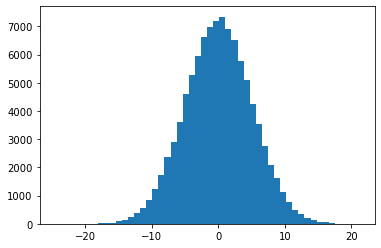

In [19]:
n, bins, patches = plt.hist(Z, bins=50)
plt.show()